In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
res_df = pd.read_csv('../analysis_report/analysis_report.csv')
res_df.drop(columns = "Unnamed: 0", inplace = True)

In [3]:
res_df.head()

,Project,Metric,os_mac,os_windows,dist_bionic,dist_focal,hw_arm64,py_3_6,py_3_8
0,seglearn,Score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,seglearn,Processing_Time,114.679313,133.830172,0.903342,-0.135501,121.815718,15.130985,3.523035
2,seglearn,Expense,973.396567,367.660343,0.903342,-0.135501,121.815718,15.130985,3.523035
3,pymfe,Score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,pymfe,Processing_Time,74.317570,177.085736,-16.532103,-15.993849,-4.882737,13.802384,2.037678


In [4]:
res_df.shape

(90, 9)

In [28]:
res_df.loc[res_df['Metric'] == 'Expense'].describe()

,os_mac,os_windows,dist_bionic,dist_focal,hw_arm64,py_3_6,py_3_8
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1085.465800,297.662400,-6.034929,-5.685779,19.488144,43.928907,3.458830
std,1143.039047,125.323782,7.003437,7.240616,51.325440,107.355221,8.156637
min,397.227238,104.049523,-19.049815,-18.680812,-51.815182,-20.993766,-13.580088
25%,622.661781,197.829995,-11.566812,-12.070418,-5.510112,8.307730,0.269163
50%,742.970653,290.300111,-4.040533,-5.683568,1.559132,13.064246,2.021751
75%,984.335028,398.252738,-0.225447,0.241522,27.006848,23.347560,4.422088
max,5827.570232,510.239852,4.283770,7.604627,190.758874,495.379224,28.492849


In [29]:
# some degree of variability Linux vs Mac
res_df.loc[(res_df['Metric'] == 'Expense') & (res_df['os_mac'] == 0)]

,Project,Metric,os_mac,os_windows,dist_bionic,dist_focal,hw_arm64,py_3_6,py_3_8


In [22]:
def two_sided_vlpot(full_df, metric):
    full_df = full_df.loc[res_df['Metric'] == metric, :]
    project = []
    pct_chng = []
    os = []
    for index, row in full_df.iterrows():
        project.append(row['Project'])
        pct_chng.append(row['os_mac'])
        os.append("MacOS")

        project.append(row['Project'])
        pct_chng.append(row['os_windows'])
        os.append("Windows")

    df = pd.DataFrame({'Project' : project,
                      'Percentage Diiference' : pct_chng,
                      'Operating System' : os})
    df['rnd'] = [''] * df.shape[0]

    #return df

    sns.violinplot(data = df, x = 'rnd', y = 'Percentage Diiference', hue = 'Operating System', split = True);
    plt.tick_params(bottom = False)
    plt.xlabel("")
    plt.ylabel("Percentage Difference")
    plt.savefig(f'../analysis_report/plots/pct_diff_os_{metric}.pdf', format = 'pdf', dpi = 300);
        
    

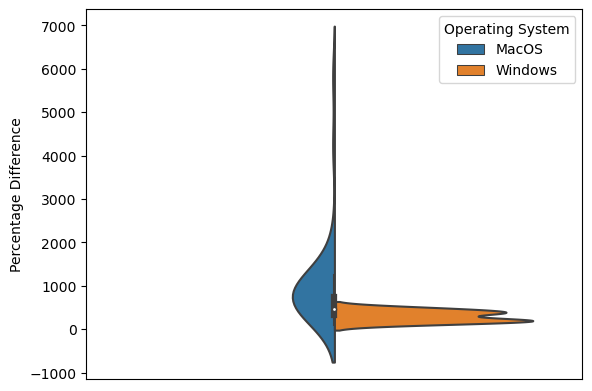

In [25]:
two_sided_vlpot(res_df, 'Expense')